In [9]:
import sklearn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
r=dir(datasets)
print(r)
wine=datasets.load_wine()
x=pd.DataFrame(wine.data)
x.columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
y=pd.DataFrame(wine.target)
y.columns=['targets']
print((y.columns.ndim))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

In [10]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit_predict(x)

In [11]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
print(len(labels))
print(clusters)


178
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


In [12]:
for i in range(13):
    cat=(clusters==i)
    print(cat)

[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False  True  True
 False False  True  True False  True  True  True  True  True  True False
 False  True  True False False  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Accuracy =  0.702247191011236


Text(0, 0.5, 'total_phenols')

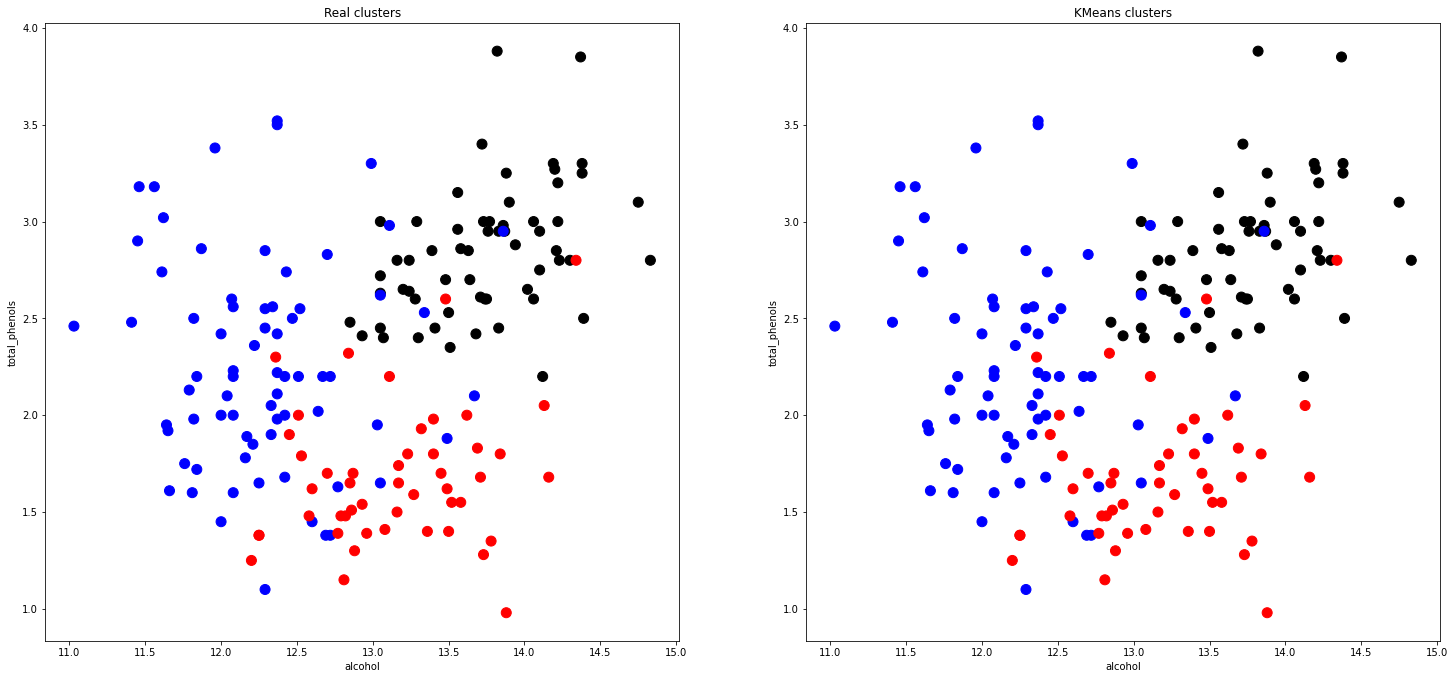

In [21]:
for i in range(13):
    cat =(clusters==i)
    labels[cat]=mode(wine.target[cat])[0]
acc=accuracy_score(wine.target,labels)
print('Accuracy = ',acc)

plt.figure(figsize=(25,25))
colormap=np.array(['black','blue','red'])
plt.subplot(2,2,1)
plt.scatter(x.alcohol,x.total_phenols,c= colormap[y.targets],s=100)
plt.title('Real clusters')
plt.xlabel('alcohol')
plt.ylabel('total_phenols')

plt.subplot(2,2,2)
plt.scatter(x.alcohol,x.total_phenols,c= colormap[y.targets],s=100)
plt.title('KMeans clusters')
plt.xlabel('alcohol')
plt.ylabel('total_phenols')